In [1]:
%%html
<style type='text/css'>
.CodeMirror{
font-family: 'Consolas';
font-size: 12px;
</style>

In [2]:
import os
os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")
os.add_dll_directory("C:/Program Files/NVIDIA/CUDNN/v8.3/bin")


<AddedDllDirectory('C:/Program Files/NVIDIA/CUDNN/v8.3/bin')>

In [9]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
N = 1000
X = np.random.random((N,2)) * 6 - 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

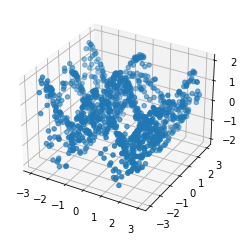

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [16]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt,loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.0530
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9742
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9547
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9225
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8803
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7873
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7162
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6454
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6211
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5764
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5405
Epoch 13/100
32/32 [=================

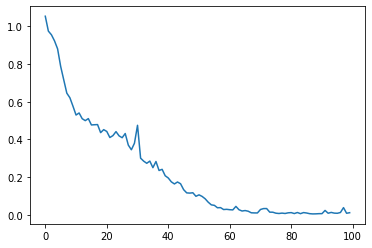

In [17]:
plt.plot(r.history['loss'], label='loss')

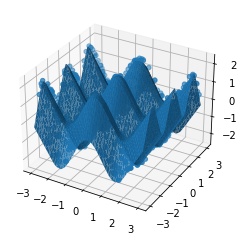

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
